In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version = 1, return_X_y = True )

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [4]:
pca.components_

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [5]:
print(pca.explained_variance_ratio_)

[0.09746116 0.07155445]


In [6]:
import numpy as np
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [7]:
print(f"Number of components for 95% variance: {d}")

Number of components for 95% variance: 154


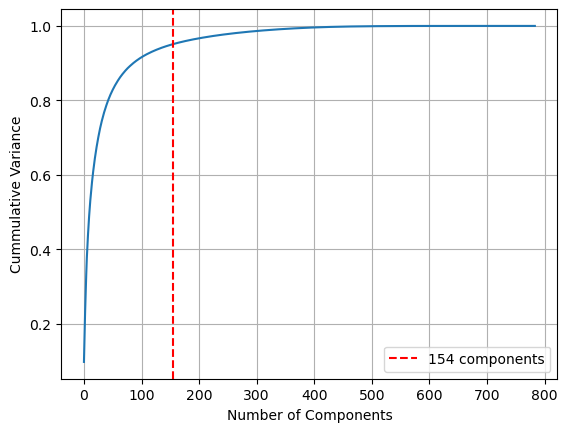

In [8]:
import matplotlib.pyplot as plt
plt.plot(cumsum)
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance')
plt.grid(True)
plt.axvline(x = d, color = 'r', linestyle = '--', label = f"{d} components")
plt.legend()
plt.show()

# it takes about 154 components to get 95 percent of data which can be explained with maximum variance

In [9]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X)

In [10]:
print(pca.explained_variance_ratio_)

[0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214  0.02106689 0.02037553
 0.01707064 0.0169402  0.01583382 0.01486345 0.01319358 0.01279014
 0.01187272 0.01152937 0.0106604  0.01009794 0.00959151 0.00909635
 0.00883287 0.00838818 0.00809832 0.00785718 0.00740262 0.00690014
 0.00656144 0.0064547  0.00600819 0.00585612 0.00566754 0.00543471
 0.00504717 0.00487079 0.00478955 0.00467594 0.00454369 0.00444918
 0.00418217 0.00396164 0.00383708 0.00375785 0.00361426 0.00349025
 0.00338732 0.00319696 0.00316854 0.00310145 0.0029648  0.00287101
 0.00282514 0.00269423 0.00268392 0.00256509 0.00253168 0.00244648
 0.00239702 0.00238581 0.00229234 0.00220949 0.0021306  0.00206317
 0.00202781 0.00195035 0.00191471 0.0018855  0.00186976 0.00180104
 0.00176787 0.00173359 0.00164849 0.00163237 0.00161408 0.00154304
 0.0014702  0.00142199 0.00141016 0.00140146 0.00139605 0.00135025
 0.00132371 0.00131893 0.00129197 0.00125172 0.00122529 0.0012

In [11]:
pca = PCA(n_components = 154)
X_mnist_reduced = pca.fit_transform(X)
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)

#There will be quality loss to compression and recompression of images because of 95% selection and drop of 5% 

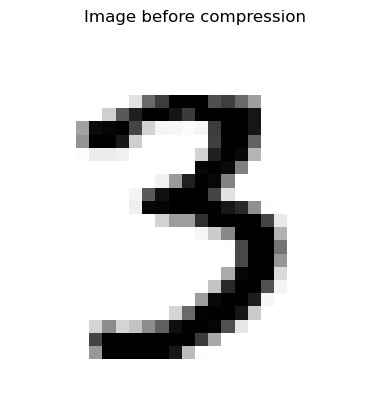

In [12]:
import matplotlib.pyplot as plt
import matplotlib

digit = X.iloc[10000].values
digit_image = digit.reshape(28,28)

plt.imshow(digit_image, cmap = "binary", 
          interpolation = "nearest")
plt.title("Image before compression")
plt.axis('off')
plt.show()

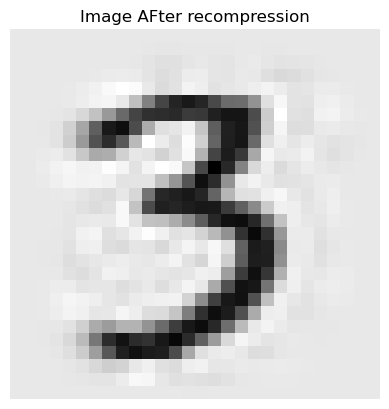

In [13]:
import matplotlib.pyplot as plt
import matplotlib

digit = X_mnist_recovered[10000]
digit_image_reduced = digit.reshape(28,28)

plt.imshow(digit_image_reduced, cmap = "binary", 
          interpolation = "nearest")
plt.title("Image AFter recompression")
plt.axis('off')
plt.show()


# there is a data loss due to recompression back to from PCA conversion

In [14]:
from  sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_mnist_reduced = inc_pca.transform(X)

# Incremental PCA does the same as PCA but it can process the data into batches which helps in limited processing power and streaming data 

C:\Users\LENOVA\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [15]:
X.shape

(70000, 784)

In [16]:
import numpy as np

np.save("D:/datasets/X_mnist.npy", X)
np.save("D:/datasets/y_mnist.npy", y)

In [17]:
m = 70000
X_shape = X.shape
X_stored = r"D:/datasets/X_mnist.npy"
n_batches = 100

X_mm = np.memmap(X_stored, dtype = "float32", mode = "readonly", shape = X_shape)

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components = 154, batch_size = batch_size)
inc_pca.fit(X_mm)


# We can use Memory Mapping Function(Memmap) to process the data in bathces by storing it in ROM disk memory and load each batch every time from storage.
# It enable out of core memory operation

C:\Users\LENOVA\anaconda3\Lib\site-packages\sklearn\decomposition\_incremental_pca.py:364: RuntimeWarning: overflow encountered in square
  explained_variance = S**2 / (n_total_samples - 1)
C:\Users\LENOVA\anaconda3\Lib\site-packages\sklearn\decomposition\_incremental_pca.py:365: RuntimeWarning: overflow encountered in square
  explained_variance_ratio = S**2 / np.sum(col_var * n_total_samples)


,n_components,154
,whiten,False
,copy,True
,batch_size,700


In [18]:
rnd_pca = PCA(n_components = 154, svd_solver = "randomized")
X_reduced = rnd_pca.fit_transform(X)

In [19]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 154, kernel = 'rbf', gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)

# Kernel PCA will compute all 70000 instances as 70000 * 70000 distance calculation . So it takes more memory as here we can see it needs 36.5 gb of ram to compute thus
# But the Kernel PCA will perform better for complex dataset but takes more memeory to process

MemoryError: Unable to allocate 36.5 GiB for an array with shape (70000, 70000) and data type float64

In [21]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '6'

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 154, n_neighbors = 10)
X_reduced = lle.fit_transform(X)

# The Manifold technique LocallLinear Embedding also needs same compute resource as KernelPCA but it will work better for Small and more complex datasets
# It performs better for complex rolled data with non linear relationship between instances

MemoryError: Unable to allocate 36.5 GiB for an array with shape (70000, 70000) and data type float64